<a href="https://colab.research.google.com/github/InDeX696/ImageViewer/blob/master/PracticaFSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from __future__ import print_function
from keras.utils import plot_model
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing import image
import numpy as np
import tensorflow as tf
from keras.optimizers import Adam
from IPython.display import display, Image

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


avion2.jpg  bird.jpg	 camion.jpg  gato.jpg	Luna3.jpg  Luna.jpg   rana.jpg
avion.jpg   caballo.jpg  deer.jpg    Luna2.jpg	Luna4.jpg  Perro.jpg


In [0]:
#El numero de pruebas que se realizan antes de que se actualize el modelo
batch_size = 32
#El numero de veces que se pasa por el data set
epochs =15
#Numero de clases a identificar
num_classes = 10


In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()



In [4]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape )
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)
print('train samples', x_train.shape[0])
print('test samples',x_test.shape[0])


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
train samples 50000
test samples 10000


[6]


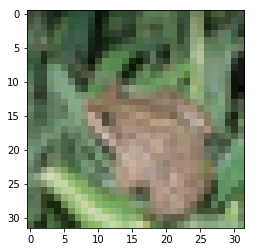

In [5]:
plt.imshow(x_test[4])
print(y_test[4])

Normalizamos los datos

In [0]:

x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu",
                 input_shape=(x_train.shape[1:])))
#Capa de reduccion de dimensiones, reduce el overfit y los calculos
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#El flatten nos convierte el tensor en un vector
model.add(Flatten())
#Capa densa fully-connected con 64 neuronas
model.add(Dense(128, activation='relu'))
#Congela de manera aleatoria algunas neuronas para asi evitar el overfit
model.add(Dropout(0.2))
#Aplicamos por ultimo la funcion softmax para dejar los valores entre 0 y 1
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [0]:
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          
          validation_data=(x_test, y_test),
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 22s 435us/step - loss: 1.5819 - acc: 0.4300 - val_loss: 1.5138 - val_acc: 0.4753
Epoch 2/15
50000/50000 [==============================] - 20s 407us/step - loss: 1.2288 - acc: 0.5657 - val_loss: 1.1724 - val_acc: 0.5881
Epoch 3/15
50000/50000 [==============================] - 20s 395us/step - loss: 1.1073 - acc: 0.6129 - val_loss: 1.0833 - val_acc: 0.6150
Epoch 4/15
50000/50000 [==============================] - 20s 392us/step - loss: 1.0328 - acc: 0.6399 - val_loss: 1.0058 - val_acc: 0.6441
Epoch 5/15
50000/50000 [==============================] - 19s 390us/step - loss: 0.9795 - acc: 0.6583 - val_loss: 0.9742 - val_acc: 0.6649
Epoch 6/15
50000/50000 [==============================] - 20s 395us/step - loss: 0.9344 - acc: 0.6745 - val_loss: 0.9444 - val_acc: 0.6819
Epoch 7/15
50000/50000 [==============================] - 20s 400us/step - loss: 0.8957 - acc: 0.6900 - val_loss: 0.

In [175]:
scores = model.evaluate(x_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

10000/10000 [==============================] - 1s 125us/step
Accuracy: 69.60%


In [0]:
model.summary()

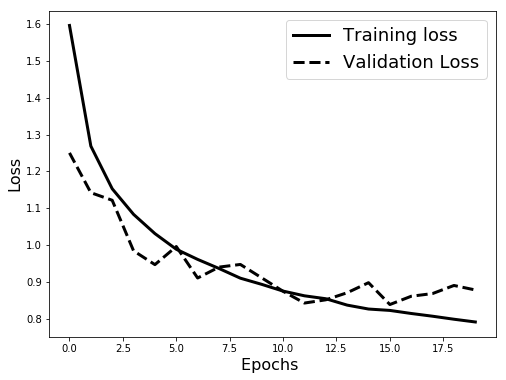

In [174]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'black',linewidth=3.0)
plt.plot(history.history['val_loss'],'black',ls = '--', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.savefig('ch3-michelucci-figxx1.png', bbox_inches='tight', dpi = 300)


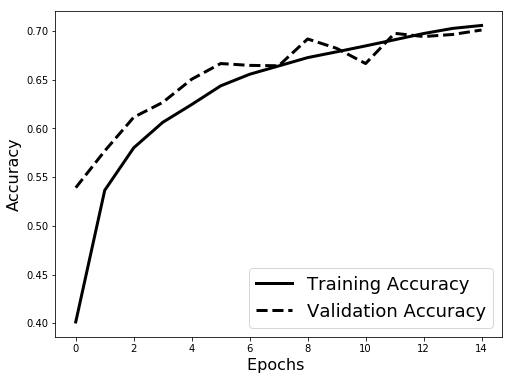

In [155]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'black',linewidth=3.0)
plt.plot(history.history['val_acc'],'black',ls = '--',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18, 
           loc = 'lower right')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
#plt.title('Accuracy Curves',fontsize=16)

plt.savefig('ch3-michelucci-figxx2.png', bbox_inches='tight', dpi = 300)

In [0]:

airplane : 0
automobile : 1
bird : 2
cat : 3
deer : 4
dog : 5
frog : 6
horse : 7
ship : 8
truck : 9
def week(i):
  switcher={
      0:'Avion',
      1:'Automovil',
      2:'Pajaro',
      3:'Gato',
      4:'Ciervo',
      5:'Perro',
      6:'Rana',
      7:'Caballo',
      8:'Barco',
      9:'Camion'
  }         
  return switcher.get(i,"Invalid day of week")

In [34]:
!ls '/content/drive/My Drive/ImgRed'

avion2.jpg  bird.jpg	 camion.jpg  gato.jpg	Luna3.jpg  Luna.jpg   rana.jpg
avion.jpg   caballo.jpg  deer.jpg    Luna2.jpg	Luna4.jpg  Perro.jpg


Rana


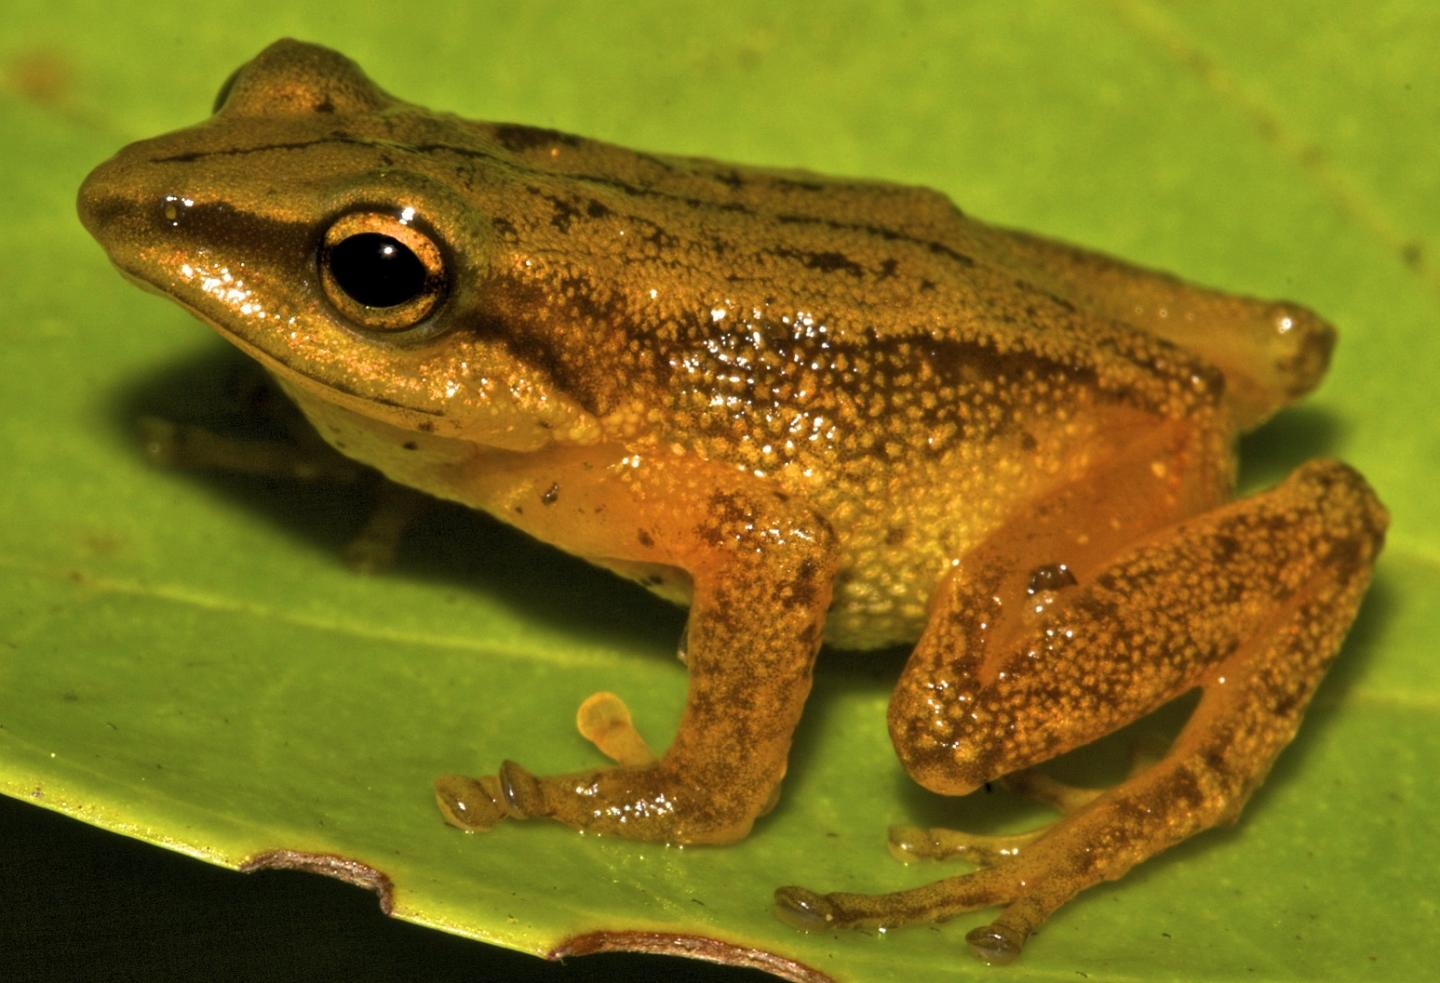

In [164]:
sess = keras.backend.get_session()
folder_path='/content/drive/My Drive/ImgRed/rana.jpg'

img = tf.read_file(folder_path)
img = tf.image.decode_jpeg(img, channels=3)
img.set_shape([None, None, 3])
img = tf.image.resize_images(img, (32, 32))
img = img.eval(session=sess) # convert to numpy array
img = np.expand_dims(img, 0) # make 'batch' of 1

pred = model.predict(img)

print(week(np.argmax(pred)))
display(Image(filename=folder_path))